<AxesSubplot:xlabel='weeks_monday'>

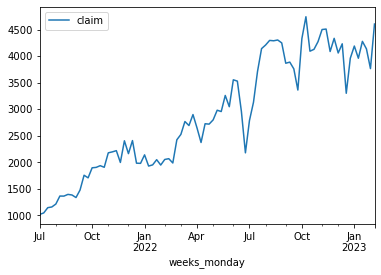

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Load the iPhone 12 dataset
df_iphone12  = pd.read_csv('/Users/xueyuanli/Desktop/DS-team/Asurion_data_iPhone_v3.csv', parse_dates=['weeks_monday','month_year'])
df_iphone12 = df_iphone12[df_iphone12['phone_generation'] == 'iphone 12']
df_iphone12 = df_iphone12.groupby(['weeks_monday'])['claim'].sum().reset_index()
df_iphone12 = df_iphone12.sort_values(by='weeks_monday')
df_iphone12.set_index('weeks_monday', inplace=True)
df_iphone12

## first and last week abnormally low so drop
df_iphone12= df_iphone12.drop(df_iphone12.index[-1])
df_iphone12=df_iphone12.drop(df_iphone12.index[0])

df_iphone12.plot()




In [3]:
df= pd.read_csv('/Users/xueyuanli/Desktop/DS-team/Asurion_data_iPhone_v3.csv', parse_dates=['weeks_monday','month_year'])
print(df)


               phone_model phone_generation phone_size phone_color  claim  \
0          apple iphone 11        iphone 11      128gb       black    111   
1          apple iphone 11        iphone 11      128gb       black    319   
2          apple iphone 11        iphone 11      128gb       black    320   
3          apple iphone 11        iphone 11      128gb       black    305   
4          apple iphone 11        iphone 11      128gb       black    269   
...                    ...              ...        ...         ...    ...   
17874  apple iphone xs max         iphone x       64gb      silver     18   
17875  apple iphone xs max         iphone x       64gb      silver     19   
17876  apple iphone xs max         iphone x       64gb      silver     14   
17877  apple iphone xs max         iphone x       64gb      silver     13   
17878  apple iphone xs max         iphone x       64gb      silver      1   

      weeks_monday  month  year month_year  
0       2021-06-28      6  202

In [4]:
df=df.set_index('weeks_monday')
df.index=pd.to_datetime(df.index)
print(df)

                      phone_model phone_generation phone_size phone_color  \
weeks_monday                                                                
2021-06-28        apple iphone 11        iphone 11      128gb       black   
2021-07-05        apple iphone 11        iphone 11      128gb       black   
2021-07-12        apple iphone 11        iphone 11      128gb       black   
2021-07-19        apple iphone 11        iphone 11      128gb       black   
2021-07-26        apple iphone 11        iphone 11      128gb       black   
...                           ...              ...        ...         ...   
2023-01-16    apple iphone xs max         iphone x       64gb      silver   
2023-01-23    apple iphone xs max         iphone x       64gb      silver   
2023-01-30    apple iphone xs max         iphone x       64gb      silver   
2023-02-06    apple iphone xs max         iphone x       64gb      silver   
2023-02-13    apple iphone xs max         iphone x       64gb      silver   

In [5]:
display(df['phone_model'].unique())

print(df['phone_model'].nunique())

array(['apple iphone 11', 'apple iphone 11 pro',
       'apple iphone 11 pro max', 'apple iphone 12',
       'apple iphone 12 mini', 'apple iphone 12 pro',
       'apple iphone 12 pro max', 'apple iphone 13',
       'apple iphone 13 mini', 'apple iphone 13 pro',
       'apple iphone 13 pro max', 'apple iphone 14',
       'apple iphone 14 pro max', 'apple iphone 3g s', 'apple iphone 4',
       'apple iphone 4s', 'apple iphone 5', 'apple iphone 5c',
       'apple iphone 5s', 'apple iphone 6', 'apple iphone 6 plus',
       'apple iphone 6s', 'apple iphone 6s plus', 'apple iphone 7',
       'apple iphone 7 plus', 'apple iphone 8', 'apple iphone 8 plus',
       'apple iphone se', 'apple iphone se 2020', 'apple iphone se 2022',
       'apple iphone x', 'apple iphone xr', 'apple iphone xs',
       'apple iphone xs max'], dtype=object)

34


In [6]:
df['brand']=df['phone_model'].str.split().str[0]
df['brand'].value_counts()

apple    17879
Name: brand, dtype: int64

In [7]:
a=df['brand'].value_counts()[:4].index.values
print(a)

print(a.shape)

['apple']
(1,)


In [12]:
def is_storage_size(s):
    if s.isdigit() and 2<=len(s)<=3:
        storage=int(s)
    if storage & (storage-1) ==0:
        return True
    return False

def process_model_name(m):
    model_last_part=m.split()[-1]
    if is_storage_size(model_last_part):
        return m.replace(model_last_part,'')
    return m

models=['apple iphone 11', 'apple iphone 11 pro',
       'apple iphone 11 pro max', 'apple iphone 12',
       'apple iphone 12 mini', 'apple iphone 12 pro',
       'apple iphone 12 pro max', 'apple iphone 13',
       'apple iphone 13 mini', 'apple iphone 13 pro',
       'apple iphone 13 pro max', 'apple iphone 14',
       'apple iphone 14 pro max', 'apple iphone 3g s', 'apple iphone 4',
       'apple iphone 4s', 'apple iphone 5', 'apple iphone 5c',
       'apple iphone 5s', 'apple iphone 6', 'apple iphone 6 plus',
       'apple iphone 6s', 'apple iphone 6s plus', 'apple iphone 7',
       'apple iphone 7 plus', 'apple iphone 8', 'apple iphone 8 plus',
       'apple iphone se', 'apple iphone se 2020', 'apple iphone se 2022',
       'apple iphone x', 'apple iphone xr', 'apple iphone xs',
       'apple iphone xs max']

for m in models:
    print(process_model_name(m))


apple iphone 11


UnboundLocalError: local variable 'storage' referenced before assignment

In [13]:
df['temp_size']=df['phone_model'].str.split().str[-1]
df['modle']=df['phone_model'].apply(process_model_name)
df.drop('phone_model')

UnboundLocalError: local variable 'storage' referenced before assignment

In [ ]:
def replace(row):
    if row['phone size']=='gb ' and is_storage_size(row['temp_size']):
        return row['temp_size']
    return row['phone_size'].replace('gb','')

df['phone_size']=df.apply(replace,axis=1)
df.drop('phone_size')


In [ ]:
df_11=df_11.sort_index(ascending=True)

df_11['generation']=df_11['model'].str.split().str[-1]


In [ ]:
df_11['weekofyear']=df_11.index.isocalendar().week.astype(int)
df_11['month']=df_11.index.month
df_11['quarter']
df_11['year']

In [ ]:
#change size and generation to int
df_11['generation']=df_11['generation'].astype(int)
df_11['size']=df_11['size'].astype(int)

In [ ]:
one_hot=pd.get_dummies(df_11['phone color'])

In [ ]:
.to_list()

In [ ]:
#boxplot: x_axis=month y_axis=claim

In [ ]:
train=df_11.iloc[:int(len(df_11)*0.75)]
test=df_11.iloc[int(len(df_11)*0.75)]

feature= df_11.columns.to_list()
feature.remove('claim')
target='claim'


X_train=train[feature]
y_train=train[target]


X_test=test[feature]
y_test=test[target]

In [ ]:
model=xgb.XGBRegressor(base_score=0.2, booster='gbtree', n_estimators=100, objective='reg:linear', max_depth=5, learning_rate=0.01)
model=model.fit(X_train, y_train, eval_set[(X_train, y_train),(X_test, y_test)])

In [ ]:
test['claim_pred']=model.predict(X_test)

rmse = mean_squared_error(test['claim'], test['claim_pred'], squared=False)

In [ ]:
feature_important=

In [ ]:
test.loc[test['black']==1]&(test['phone_size']==64), 'claim'].plot(figsize=(15,5), title='')
test.loc[test['black']==1]&(test['phone_size']==64), 'claim_pred'].plot(style='')